<img src='bike.jpg'></img>

# Problem Statement
Bike-sharing system is meant to rent the bicycle and return to the different place for the bike sharing purpose in London. You are provided with rental data spanning for almost 3 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.
<br><br>
Dataset is available on Kaggle. You can download it from <a href="https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset">here</a>.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

print("Libraries imported")

Libraries imported


In [2]:
data=pd.read_csv('bikes.csv',parse_dates=['timestamp'])

In [3]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3


### Know your data
"timestamp" - timestamp field <br>
"cnt" - total count of bikes rented during each hour <br>
"t1" - real temperature in C <br>
"t2" - temperature feels in C <br>
"hum" - humidity in percentage<br>
"wind_speed" - wind speed in km/h<br>
"weather_code" - category of the weather<br>
"is_holiday" - boolean field: 1 implies holiday and 0 implies non holiday<br>
"is_weekend" - boolean field: 1 implies weekend and 0 implies non-weekend<br>
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter<br>
"weather_code" - category field<br>

In [4]:
data.shape

(17414, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 1.3 MB


In [6]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### Plot Bike counts based on Season, Weather, Holiday and Weekend

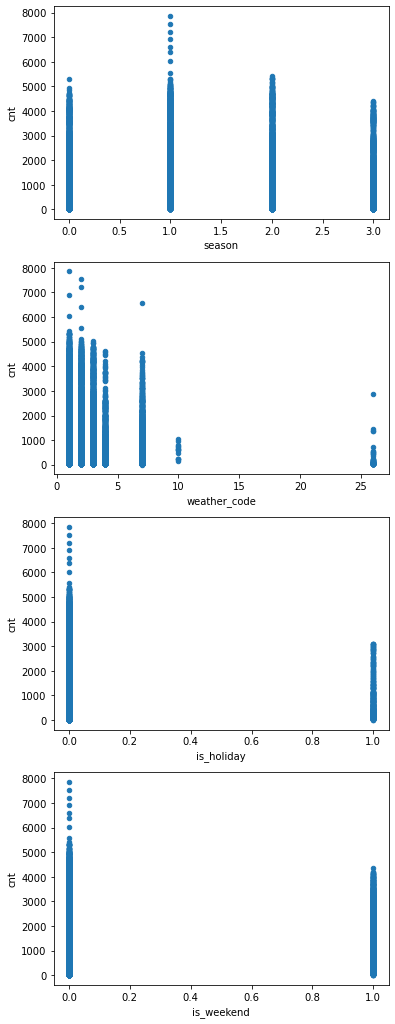

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(6, 18))

data.plot.scatter(x = 'season', y = 'cnt',ax=axes[0]);
data.plot.scatter(x = 'weather_code', y = 'cnt',ax=axes[1]);
data.plot.scatter(x = 'is_holiday', y = 'cnt',ax=axes[2]);
data.plot.scatter(x = 'is_weekend', y = 'cnt',ax=axes[3]);

<b>Inferences from above Visualizations:</b>

1. Count of bikes is more in summer season than any other season.<br>
2. Count of bikes is more on non-holidays than on a holiday<br>
3. Count of bikes is more on weekdays than on weekends.

It is clear from above visualiztions that employed people use bikes and also use more in summer as it is easy to ride bike in sunny conditions.

### Create Year, Month, Day, Hour and DayofWeek columns for better Analysis

In [8]:
data["year"] = data["timestamp"].dt.year
data["month"] = data["timestamp"].dt.month
data["day"] = data["timestamp"].dt.day
data["hour"] = data["timestamp"].dt.hour
data["datetime-dayofweek"] = data["timestamp"].dt.dayofweek
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,datetime-dayofweek
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015,4,1,0,2
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015,4,1,1,2
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015,4,1,2,2
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015,4,1,3,2
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015,4,1,4,2


### Plot Bike counts based on Year, Month, Day and Hour

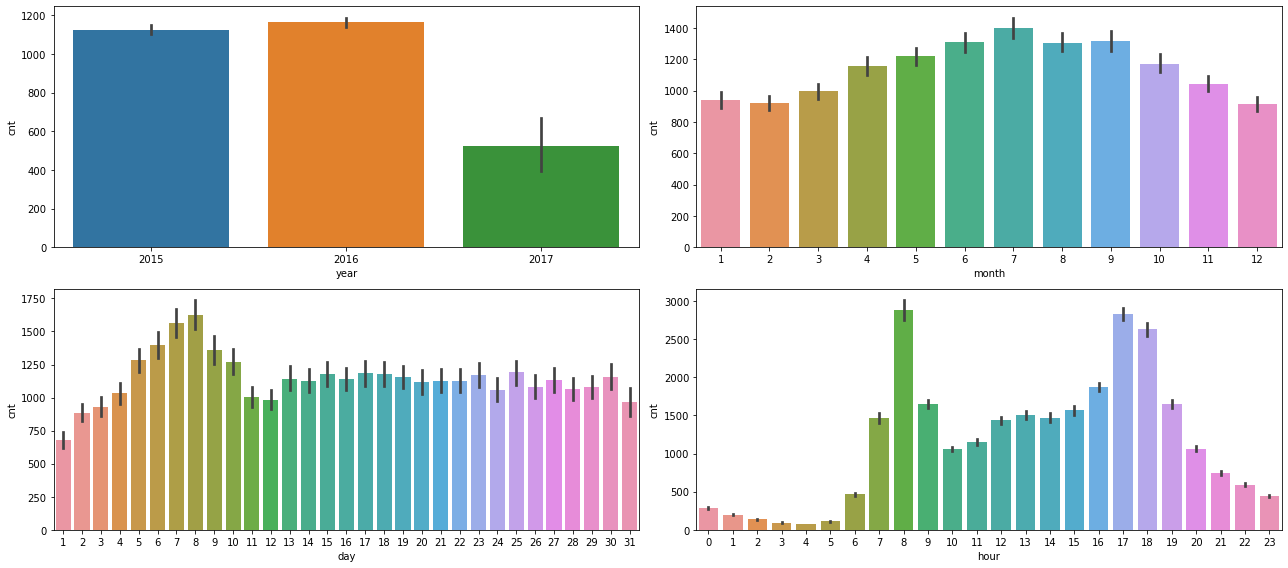

In [9]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18, 8)

sns.barplot(data=data, x="year", y="cnt", ax=ax1)
sns.barplot(data=data, x="month", y="cnt", ax=ax2)
sns.barplot(data=data, x="day", y="cnt", ax=ax3)
sns.barplot(data=data, x="hour", y="cnt", ax=ax4)
plt.tight_layout()


<b>Inferences from above Visualizations:</b><br>
1. Count of bikes with year does not show distribution and also 2017's data is not enough.
2. Count of bikes increased on month from May-July which is basically Summer season.
3. There is no such impact of Days on Count of bikes.
4. Bike sharing is more at 7-9 am and 4-7 pm which is basically office hours.

Above implications are much more in synced with our previous observations based on season, holiday and weekends.

We can also use `Point Plot` to see this visualizations more accurately:

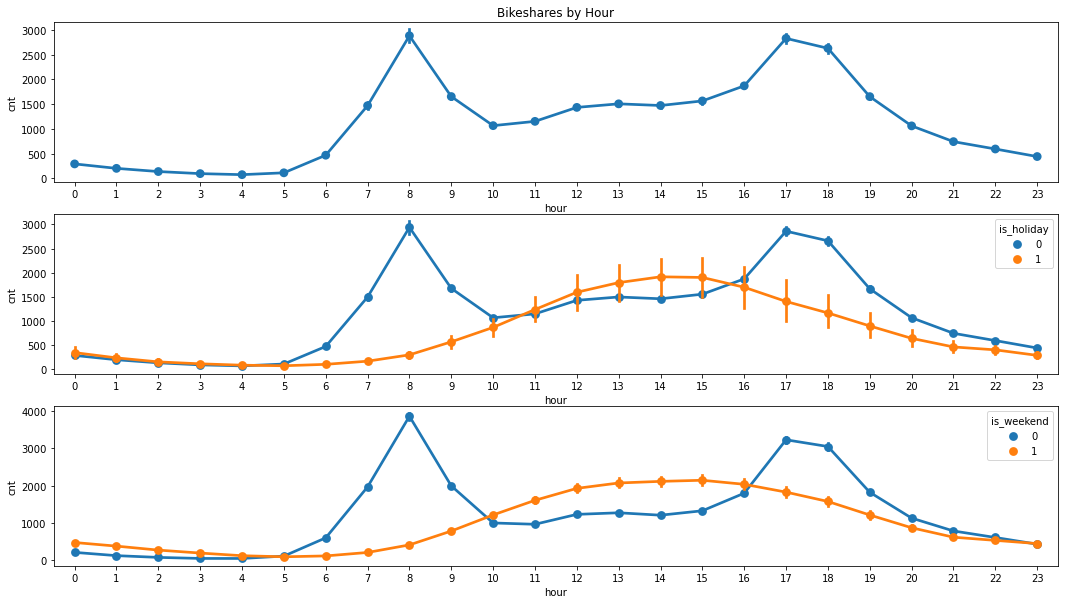

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10))
axes[0].set_title("Bikeshares by Hour")
sns.pointplot(data=data, x="hour", y="cnt", ax=axes[0])
sns.pointplot(data=data, x="hour", y="cnt", hue="is_holiday", ax=axes[1])
sns.pointplot(data=data, x="hour", y="cnt", hue="is_weekend", ax=axes[2])

We can see in above plots that there is a spike in curve at 7am and also at 5pm, which are working hours for employees. Also this spike is seen only on non holiday or non weekend day which also satisfies our above implications.

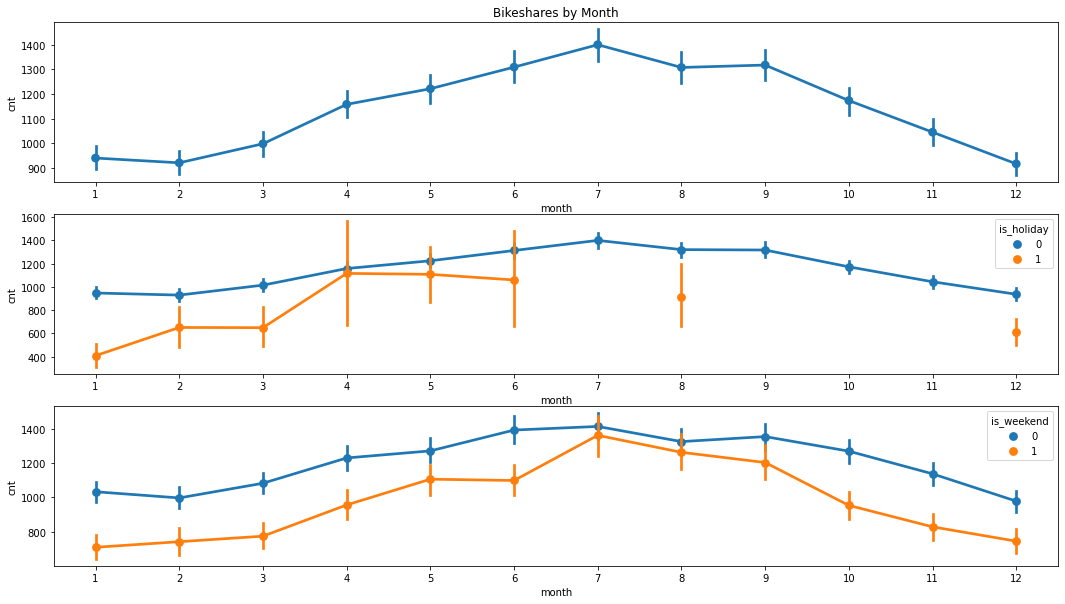

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10))
axes[0].set_title("Bikeshares by Month")
sns.pointplot(data=data, x="month", y="cnt", ax=axes[0])
sns.pointplot(data=data, x="month", y="cnt", hue="is_holiday", ax=axes[1])
sns.pointplot(data=data, x="month", y="cnt", hue="is_weekend", ax=axes[2])

We can see spike in above plots from May to July which is basically the summer season.

### Plot Bike counts based on Weather conditions

In [12]:
data['weather_code'].value_counts()

1     6150
2     4034
3     3551
7     2141
4     1464
26      60
10      14
Name: weather_code, dtype: int64

Weather Condtions are described by `weather_code` column and it's values described as follows:

1 - Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity <br>
2 - scattered clouds / few clouds<br>
3 - Broken clouds<br>
4 - Cloudy<br>
7 - Rain/ light Rain shower/ Light rain<br>
10 - rain with thunderstorm<br>
26 - snowfall<br>

In [13]:
data['weather_desc'] = data['weather_code'].map({1:"Clear", 2:"few clouds", 3:"Broken clouds", 4:"Cloudy", 
                                             7:"light Rain shower", 10:"rain with thunderstorm", 26:"snowfall"})

Text(0.5, 1.0, 'Bikeshares by Weather condition')

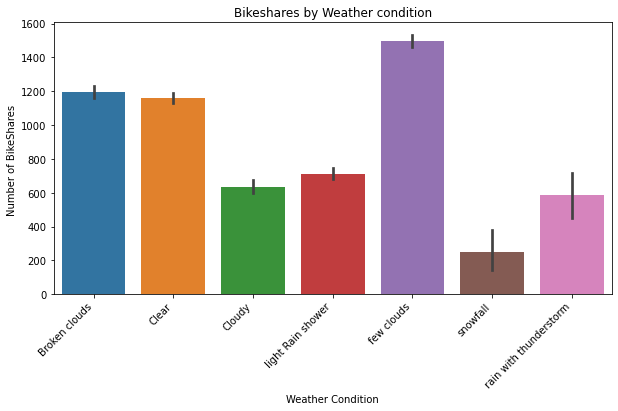

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x="weather_desc", y="cnt")
plt.xlabel("Weather Condition")
plt.ylabel("Number of BikeShares ")
plt.xticks(rotation=45,ha='right')
plt.title("Bikeshares by Weather condition")

Number of bikeshare is most when there are few clouds and also some shares when weather is clear.

### Plot Bike counts based on Numerical columns(`t1`,`t2`,`humidity`,`wind_speed`)

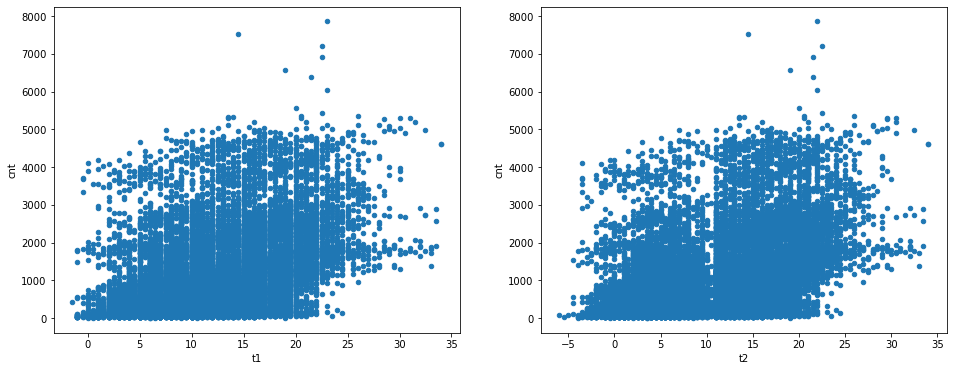

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

data.plot.scatter(x = 't1', y = 'cnt',ax=axes[0]);
data.plot.scatter(x = 't2', y = 'cnt',ax=axes[1]);

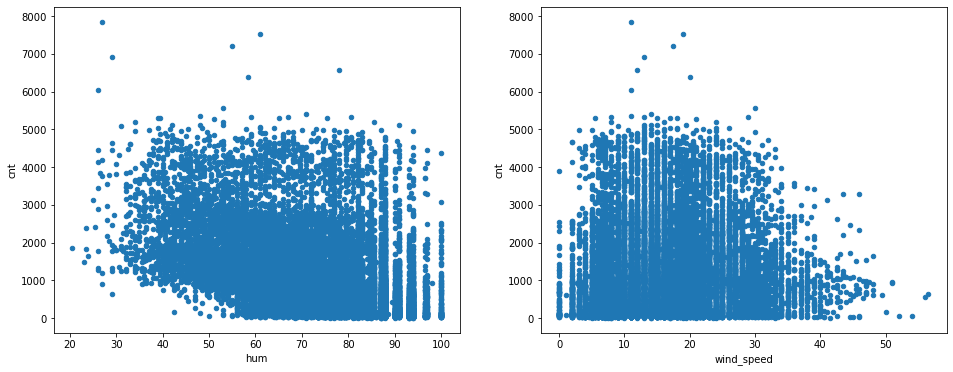

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

data.plot.scatter(x = 'hum', y = 'cnt',ax=axes[0]);
data.plot.scatter(x = 'wind_speed', y = 'cnt',ax=axes[1]);

We can see here many outliers which can hinder te accuracy of our model. We need to remove these outliers before scaling.

### Handle Outliers using zscore

In [17]:
from scipy.stats import zscore
from scipy import stats

#Declare columns consists of outliers
outlier_columns=['t1','t2','hum','wind_speed']

#Call scipy.stats.zscore(X) with X as a DataFrame to get a NumPy array containing the z-score of each value in X
z_scores = stats.zscore(data[outlier_columns])

#Call numpy.abs(Y) with Y as the previous result to convert each element in Y to its absolute value
abs_z_scores = np.abs(z_scores)

#Use the syntax (array < 3).all(axis=1) with array as the previous result to create a boolean array
filtered_entries = (abs_z_scores < 3).all(axis=1)

#Filter the original DataFrame with this result
new_data = data[filtered_entries]

In [18]:
print("Shape of Original Dataframe:" ,data.shape)
print("Shape of New Dataframe:",new_data.shape)

Shape of Original Dataframe: (17414, 16)
Shape of New Dataframe: (17214, 16)


We have removed outliers from the dataset.

### Visualizations after removing outliers

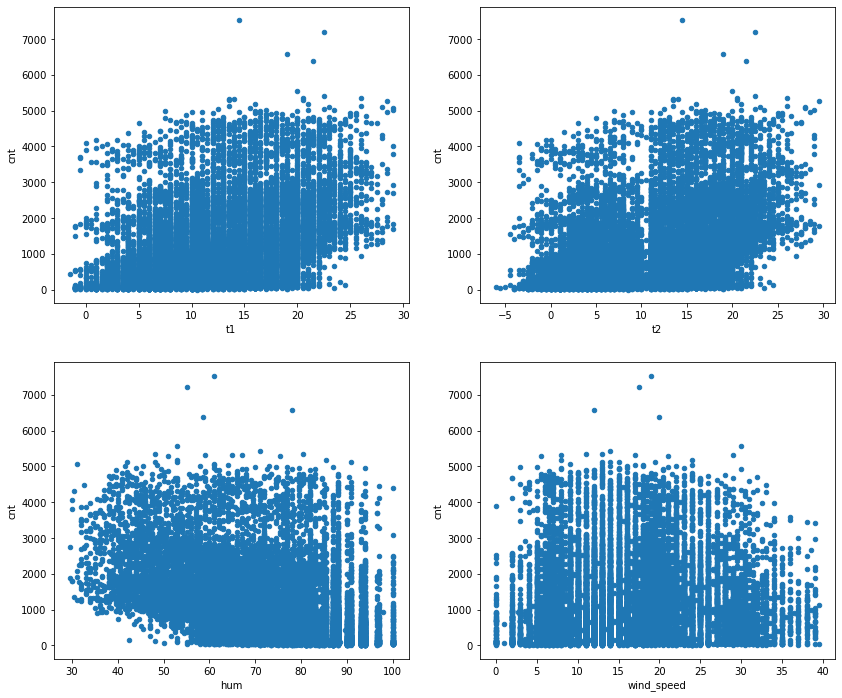

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

new_data.plot.scatter(x = 't1', y = 'cnt',ax=axes[0,0]);
new_data.plot.scatter(x = 't2', y = 'cnt',ax=axes[0,1]);
new_data.plot.scatter(x = 'hum', y = 'cnt',ax=axes[1,0]);
new_data.plot.scatter(x = 'wind_speed', y = 'cnt',ax=axes[1,1]);

In [20]:
new_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,datetime-dayofweek,weather_desc
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015,4,1,0,2,Broken clouds
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015,4,1,1,2,Clear
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015,4,1,2,2,Clear
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015,4,1,3,2,Clear
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015,4,1,4,2,Clear


In [21]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler

#Create object of StandardScaler
scaler = StandardScaler()

removed_columns=['timestamp','cnt','weather_desc','datetime-dayofweek']
#Apply fit
scaler.fit(new_data.drop(removed_columns,axis=1))

#Apply transform
scaled_features = scaler.transform(new_data.drop(removed_columns,axis=1))


In [22]:
feature_variables=['t1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season', 'year', 'month', 'day', 'hour',]

data_after_scaling=pd.DataFrame(scaled_features,columns=feature_variables)

Check data after Feature Engineering

In [23]:
data_after_scaling.head()

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,-1.711224,-1.443895,1.450984,-1.281568,0.120016,-0.149027,1.578956,1.346594,-1.001899,-0.733531,-1.680011,-1.657300
1,-1.711224,-1.367528,1.450984,-1.413467,-0.740084,-0.149027,1.578956,1.346594,-1.001899,-0.733531,-1.680011,-1.513031
2,-1.802236,-1.367528,1.699471,-2.072960,-0.740084,-0.149027,1.578956,1.346594,-1.001899,-0.733531,-1.680011,-1.368761
3,-1.893249,-1.443895,1.947958,-2.072960,-0.740084,-0.149027,1.578956,1.346594,-1.001899,-0.733531,-1.680011,-1.224491
4,-1.893249,-1.749361,1.450984,-1.215619,-0.740084,-0.149027,1.578956,1.346594,-1.001899,-0.733531,-1.680011,-1.080221



Now this data can be fed to any Machine Learning model